In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import os
from sklearn.model_selection import train_test_split

2025-07-30 11:37:47.614805: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753875468.018090      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753875468.126238      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
uninfected = r"../input/cell-images/cell_images/Uninfected"
infected = r"../input/cell-images/cell_images/Parasitized"

In [3]:
x = []
y = []

for filename in os.listdir(infected):
    try:
        img = cv2.imread(f'{infected}/{filename}')
        img = cv2.resize(img, (60, 60))
        img = img / 255
        x.append(img)
        y.append(1)
    except Exception as e:
        print(f'Error loading file {filename}: {e}')

In [4]:
for filename in os.listdir(uninfected):
    try:
        img = cv2.imread(f'{uninfected}/{filename}')
        img = cv2.resize(img, (60, 60))
        img = img / 255
        x.append(img)
        y.append(0)
    except Exception as e:
        print(f'Error loading file {filename}: {e}')

In [5]:
x_arr = np.array(x)
y_arr = np.array(y)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size=0.2, random_state=42)

In [7]:
model = Sequential(
    [
        Conv2D(input_shape=(60, 60, 3), filters=32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        Conv2D(filters=124, kernel_size=(3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
    
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753875702.364888      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1753875702.365582      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 58, 58, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 124)    │        71,548 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 77500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,960,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,053,117 (19.28 MB)

 Trainable params: 5,053,117 (19.28 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
early_stop = EarlyStopping(min_delta=0.002, patience=7, verbose=1, restore_best_weights=True)

In [11]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, verbose=1, batch_size=128, callbacks=[early_stop])

Epoch 1/100


I0000 00:00:1753875707.496482      98 service.cc:148] XLA service 0x7cdef40073f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753875707.497848      98 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1753875707.497868      98 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1753875707.788713      98 cuda_dnn.cc:529] Loaded cuDNN version 90300


  7/138 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4946 - loss: 0.6931

I0000 00:00:1753875711.776589      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


138/138 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.5514 - loss: 0.6862 - val_accuracy: 0.6238 - val_loss: 0.6682
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6014 - loss: 0.6640 - val_accuracy: 0.6331 - val_loss: 0.6532
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6097 - loss: 0.6537 - val_accuracy: 0.5810 - val_loss: 0.6650
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6358 - loss: 0.6401 - val_accuracy: 0.6719 - val_loss: 0.6164
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6428 - loss: 0.6323 - val_accuracy: 0.6159 - val_loss: 0.6400
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6576 - loss: 0.6223 - val_accuracy: 0.6800 - val_loss: 0.6117
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6755 - loss: 0.6090 - val_accuracy: 0.6580 - val_loss: 0.6059
Epoch 8/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6934 - loss: 0.5917 - val_accurac

In [13]:
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
accuracy = history.history['accuracy']

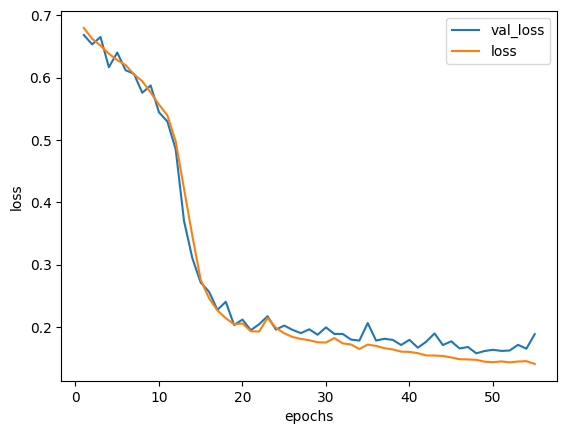

In [25]:
plt.plot(range(1, len(val_loss)+1), val_loss, label='val_loss')
plt.plot(range(1, len(loss)+1), loss, label='loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [22]:
model.evaluate(x_test, y_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9542 - loss: 0.1500


[0.15505440533161163, 0.9515602588653564]

In [23]:
prob = model.predict(x_test)
y_pred = [int(p[0]>=0.5) for p in prob]

173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2764
           1       0.94      0.96      0.95      2748

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512



In [26]:
model = Sequential(
    [
        Conv2D(input_shape=(60, 60, 3), filters=32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        Conv2D(filters=124, kernel_size=(3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
    
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [30]:
history = model.fit(x_train, y_train, validation_split=0.2, callbacks=[early_stop], batch_size=128, epochs=100, verbose=1)

Epoch 1/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.5704 - loss: 0.6795 - val_accuracy: 0.7873 - val_loss: 0.5208
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8659 - loss: 0.3463 - val_accuracy: 0.9095 - val_loss: 0.2382
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9243 - loss: 0.2064 - val_accuracy: 0.9356 - val_loss: 0.1781
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9438 - loss: 0.1657 - val_accuracy: 0.9385 - val_loss: 0.1708
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9475 - loss: 0.1466 - val_accuracy: 0.9472 - val_loss: 0.1664
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9599 - loss: 0.1147 - val_accuracy: 0.9490 - val_loss: 0.1529
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9695 - loss: 0.0901 - val_accuracy: 0.9483 - val_loss: 0.1653
Epoch 8/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9788 - loss: 0.0620 -

In [32]:
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
accuracy = history.history['accuracy']

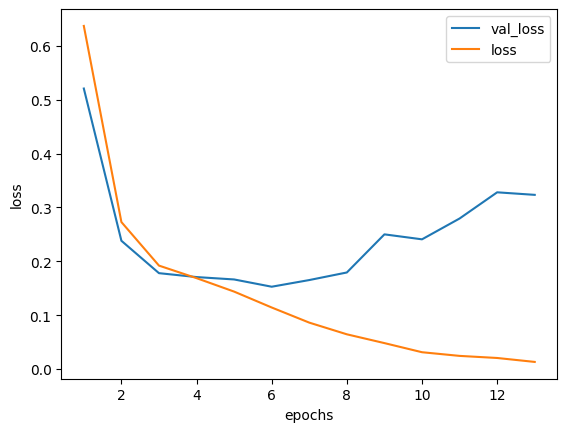

In [33]:
plt.plot(range(1, len(val_loss)+1), val_loss, label='val_loss')
plt.plot(range(1, len(loss)+1), loss, label='loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

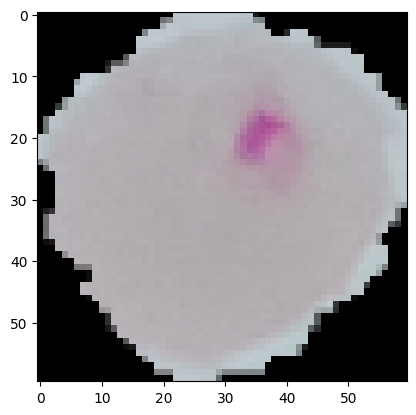

In [42]:
plt.imshow(x_train[10])
plt.show()

In [43]:
import pickle
with open('history.pkl', 'wb') as f:
    pickle.dump(model, f)